In [1]:
import numpy as np
import scipy as sp
from scipy.stats import gamma
import pandas as pd
import matplotlib.pyplot as plt
import math

Question 1: 
On cherche $\pi(\lambda|X=x)$, soit la loi à posteriori, afin de déduire f(x). La loi à posteriori est égal à la loi à priori multipliée par la vraisemblance, divisée par une constante f(x):
$$\pi(\lambda|X=x) = \frac{f(x|\Lambda=\lambda)\pi(\lambda)}{f(x)}$$
On sait que la loi à priori $\pi(\lambda)$ est conjuguée à la vraisemblance $f(x|\Lambda=\lambda)$. Ceci implique qu'en les multipliant, on peut retrouver la forme de $\pi(\lambda)$, soit la forme d'une loi Gamma. 

La constante f(x) vient du fait que l'intégrale d'une densité de probabilité sur l'entièreté de son domaine, soit la loi à posteriori ici, doit donner 1. On cherche donc une fonction $g(\lambda)$ proportionnelle à la loi à posteriori, contenant uniquement les termes en $\lambda$. Il sera ensuite possible de déduire la constante f(x) qui comprend les termes permettant de normaliser le résultat de l'intégrale de la probabilité de densité sur son domaine. 

On a donc 
$$\pi(\lambda|X=x) \propto g(\lambda)$$

Trouvons $g(\lambda)$ sachant que $f(x|\Lambda=\lambda)\pi(\lambda)$ redonne une loi Gamma. 

$$f(x|\Lambda=\lambda)\pi(\lambda) = \frac{\lambda^{\alpha-1}e^{-\beta\lambda}\beta^{\alpha}}{\Gamma(\alpha)}\Pi_{i=1}^{T}\lambda e^{-\lambda x_i}$$

On peut simplifier le produit sachant que $\lambda$ est multiplié T fois, et que le produit d'un nombre avec exposant devient la somme des exposants, on obtient:
$$f(x|\Lambda=\lambda)\pi(\lambda) = \frac{\lambda^{\alpha-1+T}e^{-\lambda(\beta+\sum_{i=1}^Tx_i)}\beta^{\alpha}}{\Gamma(\alpha)}$$
Les termes importants sont ceux contenants la variable $\lambda$, ainsi on peut écrire
$$g(\lambda) \propto \lambda^{\alpha-1+T}e^{-\lambda(\beta+\sum_{i=1}^T)}$$
Pour que $g(\lambda)$ conserve la forme d'une loi Gamma, il faut lui ajouter les valeurs $\Gamma(\lambda)$ et $\beta^{\alpha}$ en considérant que:
$\alpha$ devient $\alpha + T$ 
$\beta$ devient $\beta+\sum_{i=1}^Tx_i$

On obtient
$$g(\lambda) = \frac{\lambda^{\alpha-1+T}e^{-\lambda(\beta+\sum_{i=1}^Tx_i)}(\beta+\sum_{i=1}^Tx_i)^{\alpha+T}}{\Gamma(\alpha+T)}$$ 

On peut donc trouver f(x) :
$$\frac{f(x|\Lambda=\lambda)\pi(\lambda)}{f(x)} = g(\lambda)$$
$$f(x) = \frac{f(x|\Lambda=\lambda)\pi(\lambda)}{g(\lambda)} = \frac{\lambda^{\alpha-1+T}e^{-\lambda(\beta+\sum_{i=1}^Tx_i)}\beta^{\alpha}}{\Gamma(\alpha)}\frac{\Gamma(\alpha+T)}{\lambda^{\alpha-1+T}e^{-\lambda(\beta+\sum_{i=1}^Tx_i)}(\beta+\sum_{i=1}^Tx_i)^{\alpha+T}} = \frac{\beta^{\alpha}}{\Gamma(\alpha)}\frac{\Gamma(\alpha+T)}{(\beta+\sum_{i=1}^T x_i)^{\alpha+T}}$$












Question 2:
$$\lambda_0=E[\Lambda]=\int_0^\infty \lambda \pi(\lambda) d\lambda$$

$$\lambda_0=\int_0^\infty \frac{\lambda}{\Gamma[\alpha]} \lambda^{\alpha-1}e^{-\beta\lambda}\beta^{\alpha}d\lambda$$

$$\lambda_0=\frac{\beta^\alpha}{\Gamma(\alpha)}\int_0^\infty  \lambda^{\alpha}e^{-\beta\lambda}d\lambda$$
En posant $t=\beta \lambda$, $\alpha=z-1$ et sachant que $\int_0^{\infty}t^{z-1}e^{-t}dt=\Gamma[z]$, on peut calculer:
$$\lambda_0=\frac{\beta^\alpha}{\Gamma(\alpha)}\int_0^\infty  
 \frac{t^{z-1}}{\beta^{z-1}}e^{-\beta \frac{t}{\beta}}\frac{dt}{\beta}$$ 

 $$\lambda_0=\frac{\beta^{\alpha-1}}{\Gamma(\alpha)}\int_0^\infty  
 \frac{t^{z-1}}{\beta^{z-1}}e^{- t}dt$$ 
 
 $$\lambda_0=\frac{\beta^{\alpha-1}}{\Gamma(\alpha)(\beta^{z-1})}\int_0^\infty 
 t^{z-1}e^{- t}dt=\frac{\beta^{\alpha-1}}{\Gamma(\alpha)(\beta^{\alpha})}\Gamma[\alpha+1]=\frac{\alpha \Gamma[\alpha]}{\Gamma[\alpha] \beta^\alpha}$$
 $$\lambda_0=\frac{\alpha}{\beta}$$







 $$\hat{\lambda}=\int_0^{\infty}\lambda \pi(\lambda|X=x)$$
 $$\hat{\lambda}=\int_0^{\infty}\frac{\lambda}{f(x)}\frac{\lambda^{\alpha-1} e^{-\beta\lambda} \beta^{\alpha}}{\Gamma[\alpha]} \Pi_{i=1}^T \lambda e^{-\lambda x_i} d\lambda$$
 $$\hat{\lambda}=\frac{\beta^\alpha}{\Gamma[\alpha]}\int_0^\infty \frac{\lambda^{\alpha}\lambda^T e^{-\beta \lambda} e^{\sum_{i=1}^T -\lambda x_i}}{\frac{B^{\alpha}}{\Gamma(\alpha)}\bigg[ \Gamma(T+\alpha)(\beta+\sum_{x_i=1}^{\infty}x_i)^{-\alpha-T}\bigg]}d\lambda$$

  $$\hat{\lambda}=\frac{1}{\Gamma(T+\alpha)(\beta+\sum_{x_i=1}^{\infty}x_i)^{-\alpha-T}}\int_0^\infty\lambda^{\alpha}\lambda^T e^{-\beta \lambda} e^{-\lambda \sum_{i=1}^T x_i}d\lambda$$
  $$\hat{\lambda}=\frac{1}{\Gamma(T+\alpha)(\beta+\sum_{x_i=1}^{\infty}x_i)^{-\alpha-T}}\int_0^\infty\lambda^{\alpha+T} e^{-\lambda(\beta+\sum_{i=1}^T x_i)}d\lambda$$
L'intégrale peut se résoudre grâce à la relation utilisé plus haut: 
$$\int_0^\infty\lambda^{\alpha+T} e^{-\lambda(\beta+\sum_{i=1}^T x_i)}d\lambda=\int_0^\infty\lambda^{\alpha+T} e^{-C_1\lambda}d\lambda$$
En posant $\alpha+T=z-1$ ains qui $t=\frac{\lambda}{C_1}$, $dt=C_1 d\lambda$:
$$\int_0^\infty\lambda^{\alpha+T} e^{-C_1\lambda}d\lambda=\int_0^\infty(\frac{t}{C_1})^{z-1} e^{-t}\frac{dt}{C_1}$$
$$=\frac{1}{C_1^z}\int_0^\infty t^{z-1}e^{-t}dt=\frac{1}{C_1^z}\Gamma[z]=\frac{\Gamma[\alpha+T+1]}{(\beta+\sum_{i=1}^T x_i)^{\alpha+T+1}}$$
En reprenant dans l'équation de $\hat{\lambda}$:

$$\hat{\lambda}=\frac{\Gamma[\alpha+T+1]}{(\beta+\sum_{i=1}^T x_i)^{\alpha+T+1}\Gamma(T+\alpha)(\beta+\sum_{x_i=1}^{\infty}x_i)^{-\alpha-T}}$$
Avec l'identité $\Gamma[z+1]=z\Gamma[z]$:
  
$$\hat{\lambda}=\frac{(\alpha+T)\;\Gamma(T+\alpha)}{\Gamma(T+\alpha)(\beta+\sum_{x_i=1}^{\infty}x_i)}=\frac{\alpha+T}{\beta+\sum_{x_i=1}^{\infty}x_i}$$


Question 3: Pour lire les trois fichiers, il est possible d'utiliser le module pandas. 

In [2]:
def txt_to_list(file_path):
    float_list = []
    with open(file_path, 'r') as file:
        for line in file:

            float_list.append(float(line.strip()))
    return float_list

data0= txt_to_list("Tp1/data/activite_temps_0.txt")
data1= txt_to_list("Tp1/data/activite_temps_1.txt")
data2= txt_to_list("Tp1/data/activite_temps_2.txt")



Question 4:

$$f(x)=\int_0^\infty\frac{B^{\alpha}\lambda^{\alpha-1}e^{-\beta\lambda}}{\Gamma(\alpha)} \lambda^T e^{-\lambda\cdot \sum_{x_i=1}^{\infty}x_i}d\lambda$$

$$\hat{\lambda}=\int_0^{200}=\lambda\frac{1}{f(x)}\frac{B^{\alpha}\lambda^{\alpha-1}e^{-\beta\lambda}}{\Gamma(\alpha)} \lambda^T e^{-\lambda\cdot \sum_{x_i=1}^{\infty}x_i}d\lambda$$
Pour se simplifier la tâche lors de la construction de ces équations dans python, nous pouvons y aller en plusieurs morceaux. Premièrement, le terme $\frac{\lambda^{\alpha-1}e^{-\Beta\lambda}B^{\alpha}}{\Gamma(\alpha)}$ peut être représenté comme un fonction gamma avec les paramètres $\alpha=2$,$\beta=\frac{1}{4}$ grâce au module scipy.

In [3]:
##############INPUTS################################# 
alpha=2
beta=1/4 
dataset=data0
######Calcul des délais################
def delay(data):
    delais=[]
    for i in range(0, len(data)):
        if i == (len(data)-1):
            break
        else:
            delais.append(data[i+1]-data[i])
    return(delais)

sum_x=sum(delay(dataset))

################################
T=len(delay(dataset))

################### Méthode de simpson
def simpson(f, a, b, N):        #Fonction qui effectue le calcul de l'intégral
    #Paramètres: f: intégrande, [a, b]: limite d'intégration, N: nombre de tranche
    h = (b - a) / N             # Le pas utilisé (dx)
    x = np.linspace(a, b, N) 
    s1=0.0
    for k in range(1, N, 2):
        s1 += f(a+k*h)
    s2=0.0
    for k in range(2, N, 2):
        s2 += f(a+k*h)
    return((f(a)+f(b)+4.0*s1+2.0*s2)*h/3.0) #Formule de simpson

################### Calcul de f(x) avec l'équation analytique###########################
def func_gamma(x): 
    return (math.factorial(x-1)) #Gamma(n)=(n-1)!

def f(L):           # La variable lambda est représenté par la lettre L
    return(gamma.pdf(L, alpha, scale=1/beta)*(L**len(dataset))*math.exp(-L*sum_x)) # constante de normalisation f(x), la fonction gamma.pdf
                                                                                    # retourne la densité de probabilité


fx_chiffre=((beta**alpha)/(func_gamma(alpha)))*func_gamma(T+alpha)*((beta+sum_x)**(-alpha-T))
fx_int=simpson(f, 0, 200, 10000)



def test(x):
    return(x**2+2*x+3)

print(simpson(test, 0, 200, 10000))


############### Définition de la fonction lambda_hat
def lambda_ideal(L):
    return(L*(1/fx_chiffre)*gamma.pdf(L, alpha, scale=1/beta)*L**len(dataset)*math.exp(-L*sum_x)) #Équation de la valeur idéale


############################## Calcul de l'intégral de Simpson ########







2707266.6666666665


Pour la méthode de Romberg, il faut premièrement définir un calcul de l'intégral avec la méthode du trapèze, puis par la suite itérer en augmentant le nombre de tranche jusqu'à ce que l'erreur sur calculs soit en dessous de notre critère. Deux équations sont nécéssaires soit celle de l'erreur: $c_m h_i^{2m}=\frac{1}{4^m-1}(R_{i,m}-R_{i-1,m})+O(h_i^{2m+2})$ ainsi que celle pour calculer les différents facteurs R : $R_{i, m}=$.

In [4]:
def trapèze(f,a, b, N):
    h=(b-a)/N
    s=0.5*f(a)+0.5*f(b)
    for k in range(1,N):
        s += f(a+k*h)
    return(h*s)

def romberg(f, a, b, N, epsilon):
    #paramètres f: intégrande, [a, b]: domaine d'intégration, N: nombre de tranches, epsilon: erreur acceptable
    count=0 #initialise un compteur pour s'assurer un minimum d'itérations avant d'arrêter la fonction
    flag = False #initialise un drapeau pour permettre de briser toutes les boucles si besoin est
    R = np.zeros((N, N)) #Matrice de Romberg vide
    for i in range(30, N):
        count += 1
        R[i, 0] = trapèze(f, a, b, i) #On commence par calculer la première valeur d'une ligne. Ex: R_11, R_21, R_31 etc
        for m in range(0, i):
            R[i, m+1] = (4**(m+1) * R[i, m] - R[i-1, m]) / (4**(m+1) - 1) # On calcul le restant des valeurs de la ligne. Ex: R_31, R_32, R_33
            if (R[i, m]-R[i-1, m])/(4**i-1) < epsilon and count > 400: # On calcul si l'erreur est plus petite que la valeur acceptable et que le 
                flag = True                                            # nombre minimal d'itérations a été atteint
                print("limite erreur atteinte")
                break
        if flag == True: #On sort des deux boucles
            break
    return R[-1,-1]

fx=romberg(f, 0, 200, 200, 1E-16)
lambda_hat=romberg(lambda_ideal, 0, 200, 200, 1E-3)

def g(x):
    return(x**2+2*x+3)
print(romberg(g, 0, 200, 400, 1E-16))


















2707275.024088569


Question 5: Erreur sur la mesure
L'erreur engendré par chacune des méthodes d'intégration peut être calculé avec l'équation 5.30 du Computational Physics de Newman: $\epsilon=\frac{1}{3}[I_i-I_{i-1}]$, où $I_i$ est la valeur calculé de l'intégral pour un nombre de tranche i. 

2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
10000


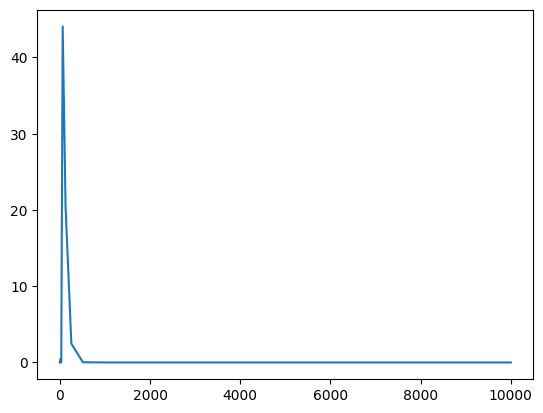

In [5]:
def erreur_romberg(f, I):
    j= I/2
    j = int(j)
    x = romberg(f, 0, 200, I, 1E-16)
    y =romberg(f, 0, 200, j, 1E-16)
    erreur_romberg = (1/3)*(x-y)
    return erreur_romberg

def erreur_simpson(f, I):
    j= I/2
    j = int(j)
    a = simpson(f, 0, 200, I)
    b = simpson(f, 0, 200, j)
    erreur_simpson = abs((1/3)*(a-b))
    return erreur_simpson

#erreur_romberg(200, 100)

erreur_simpson(lambda_ideal, 10000)

liste_erreur = []
liste_i = []

for i in range(1, 15):
    n = 2**i
    if n > 10000:
        n = 10000
    liste_i.append(n)
    print(n)
    liste_erreur.append(erreur_simpson(lambda_ideal, n))
plt.plot(liste_i, liste_erreur)
#plt.plot(liste_i[10:15], liste_erreur[10:15])




Question 6: Les défis relié à l'intégration numérique....


In [14]:
#Question 7
delais0= delay(data0)
delais1=delay(data1)
delais2=delay(data2)

delais0_formatté=["%.4f" % i for i in delais0]
delais0_formatté=[float(i) for i in delais0_formatté]

arr0 = np.array(delais0_formatté)
